As of now, despite that only a few days have passed since this competition started, we know a lot about the structure of dataset. We know about ID's, splits, etc. etc.
I tried to put everything we knew so far together and generate a synthetic `train.csv` dataset from scratch as similar as possible to Kaggle's `train.csv`.
I then ran some EDA on it and also trained some of the public kernels on this synthetic dataset and compared the CV score to theirs. 

Hope you enjoy this kernel. Don't forget to upvote and share your opinions.



First, we generate the dataset from 512 different classification datasets by using sklearn's `make_calssification`. 

In [1]:
from sklearn.datasets import make_classification 
import numpy as np
import pandas as pd
np.random.seed(2019)

# generate dataset 
train, target = make_classification(512, 255, n_informative=np.random.randint(33, 47), n_redundant=0, flip_y=0.08)
train = np.hstack((train, np.ones((len(train), 1))*0))

for i in range(1, 512):
    X, y = make_classification(512, 255, n_informative=np.random.randint(33, 47), n_redundant=0, flip_y=0.08)
    X = np.hstack((X, np.ones((len(X), 1))*i))
    train = np.vstack((train, X))
    target = np.concatenate((target, y))
    

Silly column names abound;

let's add some names to our features. It must be silly and cryptic so let's have this format of `kind-color-animal-goal`. 

Note that if you want it to look more cryptic you can rename some of them and replace `goal` part with `animal` part or `animal` part with `color` part so that the competitors spend some time on that too. For example make something like `slimy-seashell-cassowary-goose` (this column actually exists in Kaggle's train.csv).

You can also add some probabilities in `np.random.choice()` to make them look as such that there is pattern.

In [2]:
col_names = []
kind_arr = ['muggy', 'dorky', 'slimy', 'snazzy', 'frumpy', 'stealthy', 'chummy', 'hazy', 'nerdy', 'leaky', 'ugly', 'shaggy', 'flaky','squirrely', 'freaky', 'lousy', 'bluesy', 'baggy', 'greasy',
       'cranky', 'snippy', 'flabby', 'goopy', 'homey', 'homely', 'hasty','blurry', 'snoopy', 'stinky', 'bumpy', 'slaphappy', 'messy','geeky', 'crabby', 'beady', 'pasty', 'snappy', 'breezy', 'sunny',
       'cheeky', 'wiggy', 'flimsy', 'lanky', 'scanty', 'grumpy', 'chewy','crappy', 'clammy', 'tasty', 'thirsty', 'gloppy', 'gamy', 'hilly','woozy', 'squeaky', 'lovely', 'paltry', 'smelly', 'pokey','skanky', 'zippy', 'sleazy', 'queasy', 'foggy', 'wheezy', 'droopy',
       'cozy', 'skinny', 'seedy', 'stuffy', 'jumpy', 'trippy', 'woolly','gimpy', 'randy', 'silly', 'craggy', 'skimpy', 'nippy', 'whiny','boozy', 'pretty', 'sickly', 'shabby', 'surly']
color_arr = ['smalt', 'peach', 'seashell', 'harlequin', 'beige', 'cream','emerald', 'indigo', 'amaranth', 'tangerine', 'silver','chocolate', 'tan', 'plum', 'rose', 'copper', 'scarlet','cinnamon', 'cardinal', 'auburn', 'sepia', 'brass', 'eggplant',
       'ruby', 'blue', 'wisteria', 'maroon', 'tomato', 'mauve', 'pumpkin','teal', 'goldenrod', 'aquamarine', 'gamboge', 'persimmon','mustard', 'red', 'magnolia', 'chestnut', 'champagne', 'flax',
       'viridian', 'amber', 'zucchini', 'myrtle', 'lemon', 'pear',
       'xanthic', 'turquoise', 'lilac', 'amethyst', 'lime', 'pink',
       'periwinkle', 'crimson', 'burgundy', 'purple', 'rust', 'cerise',
       'khaki', 'malachite', 'violet', 'sangria', 'magenta', 'russet',
       'apricot', 'cobalt', 'platinum', 'denim', 'yellow', 'sapphire',
       'bronze', 'green', 'thistle', 'buff', 'razzmatazz', 'charcoal',
       'ultramarine', 'puce', 'carmine', 'gold', 'asparagus', 'ivory',
       'orange', 'vermilion', 'chartreuse', 'heliotrope', 'azure', 'grey',
       'jade', 'olive', 'coral', 'brown', 'cinnabar', 'lavender', 'aqua',
       'firebrick', 'corn', 'bistre', 'cyan', 'ochre', 'dandelion',
       'white']
animal_arr = ['axolotl', 'sheepdog', 'cassowary', 'chicken', 'mau', 'pinscher',
       'tarantula', 'cuttlefish', 'wolfhound', 'lizard', 'chihuahua',
       'indri', 'beetle', 'sheep', 'angelfish', 'penguin', 'wallaby',
       'oriole', 'hound', 'bonobo', 'dogfish', 'vole', 'coral', 'fowl',
       'bombay', 'bulldog', 'oyster', 'blue', 'armadillo', 'ragdoll',
       'wolverine', 'moorhen', 'otter', 'bat', 'affenpinscher', 'rat',
       'caterpillar', 'newt', 'collie', 'weasel', 'guppy', 'bullfrog',
       'alligator', 'sloth', 'moth', 'kudu', 'wasp', 'okapi', 'quoll',
       'shrew', 'walrus', 'schnauzer', 'termite', 'dragonfly', 'kakapo',
       'quetzal', 'capuchin', 'eel', 'iguana', 'zonkey', 'fousek',
       'javanese', 'leopard', 'gorilla', 'malamute', 'birman', 'donkey',
       'lionfish', 'llama', 'emu', 'koala', 'saola', 'neanderthal',
       'horse', 'mammoth', 'duck', 'peccary', 'hippopotamus',
       'grasshopper', 'dolphin', 'gharial', 'frog', 'ostrich', 'akbash',
       'bison', 'hyrax', 'capybara', 'earwig', 'cuscus', 'chinook',
       'jackal', 'hornet', 'monkey', 'bordeaux', 'reindeer', 'squid',
       'maltese', 'buffalo', 'hedgehog', 'octopus', 'swan', 'husky',
       'zebu', 'olm', 'retriever', 'lemur', 'dhole', 'rabbit', 'loon',
       'cat', 'millipede', 'flamingo', 'opossum', 'turtle', 'eagle',
       'eleuth', 'binturong', 'uguisu', 'whippet', 'tiger', 'lobster',
       'macaque', 'scorpion', 'goat', 'tapir', 'audemer', 'fox', 'molly',
       'discus', 'gopher', 'gerbil', 'civet', 'gecko', 'dog', 'squirt',
       'insect', 'tarsier', 'whale', 'paradise', 'deer', 'urchin',
       'serval', 'rhinoceros', 'numbat', 'frigatebird', 'catfish', 'kiwi',
       'bee', 'seahorse', 'beagle', 'tzu', 'dodo', 'mayfly', 'impala',
       'dachshund', 'budgerigar', 'moose', 'labradoodle', 'spider',
       'flounder', 'woodpecker', 'bobcat', 'corgi', 'buzzard', 'clam',
       'hamster', 'bandicoot', 'mandrill', 'lemming', 'snail', 'havanese',
       'hyena', 'monster']
goal_arr = ['pembus', 'ordinal', 'goose', 'distraction', 'golden', 'entropy',
       'unsorted', 'sorted', 'important', 'fimbus', 'grandmaster',
       'sumble', 'noise', 'discard', 'dummy', 'fepid', 'contributor',
       'learn', 'dataset', 'master', 'expert', 'kernel', 'hint', 'novice',
       'gaussian']
for _ in range(255):
    new_col_name = np.random.choice(kind_arr) + '-' + np.random.choice(color_arr) + '-' + np.random.choice(animal_arr) + '-' + np.random.choice(goal_arr)
    col_names.append(new_col_name)
col_names.append('wheezy-copper-turtle-magic')


# build the dataframe
train = pd.DataFrame(train, columns=col_names)
train['target'] = target

Add mysterious IDs. 

As Yirun found in https://www.kaggle.com/c/instant-gratification/discussion/92634#latest-537452, md5 hashing seems cool.

In [3]:
import hashlib

def generate_hashed_id(inp):
    return hashlib.md5(bytes(f'{inp}train', encoding='utf-8')).hexdigest()
    
train['id'] = train.index
train['id'] = train['id'].apply(generate_hashed_id)

# re-arrange columns
cols = [c for c in train.columns if c not in ['id', 'target']]
train = train[['id', 'target']+cols]

Now that the dataset is ready let's take a look at it from different aspects to see if it's similar enough?
First we're gonna look at the head of dataframe.

In [4]:
train.head()

,id,target,dorky-harlequin-beetle-kernel,stuffy-auburn-clam-master,squeaky-flax-gorilla-entropy,ugly-seashell-whale-novice,woolly-chartreuse-beetle-gaussian,baggy-azure-whippet-expert,lousy-eggplant-bandicoot-goose,frumpy-azure-husky-grandmaster,baggy-gold-dodo-dummy,sickly-thistle-horse-dummy,cheeky-green-kudu-important,skimpy-burgundy-budgerigar-pembus,jumpy-amaranth-husky-dataset,messy-yellow-cat-goose,foggy-yellow-monkey-sorted,whiny-xanthic-rat-novice,foggy-seashell-blue-dataset,messy-magenta-dragonfly-sorted,pretty-amethyst-wallaby-unsorted,crabby-copper-dog-gaussian,hasty-ruby-hippopotamus-discard,cheeky-sangria-sloth-noise,gimpy-ivory-bonobo-golden,smelly-chestnut-monster-fimbus,skinny-azure-kakapo-goose,foggy-purple-sheep-dataset,thirsty-amber-sheepdog-dummy,whiny-azure-discus-expert,homey-red-leopard-contributor,blurry-rust-havanese-expert,snazzy-ivory-hornet-unsorted,slimy-magnolia-dhole-fepid,baggy-beige-bandicoot-pembus,flaky-beige-havanese-golden,pasty-gold-monster-fimbus,shaggy-magnolia-neanderthal-entropy,zippy-chartreuse-paradise-dummy,ugly-cinnamon-caterpillar-sorted,...,foggy-goldenrod-wallaby-contributor,sickly-azure-dolphin-grandmaster,sunny-chocolate-akbash-distraction,queasy-razzmatazz-otter-fimbus,beady-lilac-wolfhound-sumble,lovely-lilac-chihuahua-expert,scanty-corn-eel-distraction,droopy-sangria-ragdoll-ordinal,flimsy-xanthic-macaque-noise,gamy-amaranth-husky-novice,wiggy-cerise-lizard-master,dorky-lilac-hyrax-fepid,chewy-dandelion-catfish-noise,whiny-jade-schnauzer-dummy,foggy-cardinal-lobster-master,sleazy-rust-snail-distraction,frumpy-puce-grasshopper-discard,tasty-orange-swan-pembus,snazzy-maroon-bee-learn,stealthy-ruby-whippet-learn,frumpy-champagne-lizard-learn,jumpy-goldenrod-bordeaux-distraction,frumpy-copper-lemming-noise,trippy-gold-hamster-sumble,homely-lilac-duck-ordinal,grumpy-cerise-kudu-ordinal,skimpy-corn-oriole-hint,skinny-jade-gecko-goose,cheeky-green-hamster-contributor,nerdy-amber-buffalo-learn,sleazy-viridian-koala-gaussian,messy-rust-tapir-learn,homely-asparagus-catfish-expert,homey-beige-woodpecker-gaussian,stealthy-beige-spider-grandmaster,dorky-rose-deer-expert,cranky-denim-kudu-novice,snippy-sapphire-deer-ordinal,gloppy-gamboge-lobster-gaussian,wheezy-copper-turtle-magic
0,707b395ecdcbb4dc2eabea00e4d1b179,0,0.361988,0.800722,0.285290,2.131916,-0.971816,-0.035853,1.836528,5.200670,-0.712048,-0.811234,-0.280166,0.987902,0.887960,-0.135895,0.688750,-0.496557,0.447202,0.372576,-1.041362,1.363257,-0.706172,0.935225,0.000570,0.806447,3.693104,1.207067,0.588688,-3.490971,-0.638524,1.584710,-1.198264,-0.718313,1.804399,-5.421629,-0.155528,-1.210446,-3.976147,-1.553612,...,-0.247611,1.266429,2.055453,0.811123,-7.781638,-1.014561,-0.615674,-1.370322,0.150467,0.869721,-0.287071,3.489284,0.091068,-6.518124,2.671367,-0.781835,-0.044571,-0.920681,-4.463529,1.214298,1.244702,0.067794,2.283863,0.166362,-0.576070,0.259842,-0.972256,-0.179758,-0.361561,0.187570,0.549947,0.772132,1.155508,1.543413,0.880964,-0.824948,-1.148359,0.173112,-5.533619,0.0
1,5880c03c6582a7b42248668e56b4bdec,1,-0.588865,5.818827,-0.024596,1.684592,0.312051,1.800059,-0.180119,4.872139,1.818619,2.002869,-0.277058,2.453628,-0.045175,-1.188510,-1.104092,-1.013684,-0.401780,0.240011,0.260622,-0.269404,-0.810308,-1.700867,1.576741,-0.405563,5.530127,2.999928,0.422612,6.389254,-0.480632,5.170131,-0.142410,-1.368069,1.440974,-3.453831,-0.229906,0.528992,-2.387657,-1.257270,...,0.636820,-1.249629,2.011138,1.072511,-3.632778,-0.969122,-0.667627,-1.195675,6.660811,0.130577,-0.158521,-1.087954,-1.839402,2.774617,-0.447509,1.239125,0.344749,-0.287342,3.341106,-0.157985,-0.022708,0.337090,0.674369,-1.511124,0.164728,1.079381,-1.061053,0.373309,-0.820075,1.316077,0.788142,-0.830212,-0.255550,0.122592,-0.426999,-0.106917,0.049515,0.683122,1.431327,0.0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,0,-1.110505,-4.703371,-1.670919,-0.511024,-0.053737,0.427571,0.484149,-0.450925,-1.382339,-1.756458,-0.641208,-0.668037,1.650231,0.444302,-0.888878,-0.1

We have super balanced target classes in Kaggle's train.csv, Does sklearn generates balanced target classes? i.e. do we have super balanced target classes? Yes!

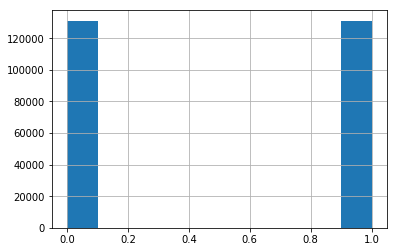

In [5]:
train.target.hist()

How about the histograms? Are they similar to Kaggle's train.csv? Compare the shapes of this dataset to Bojan's EDA at https://www.kaggle.com/tunguz/instant-eda

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


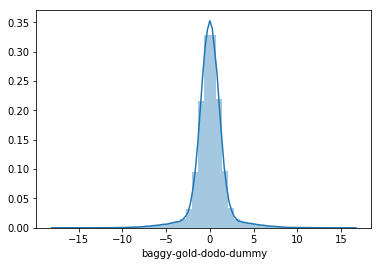

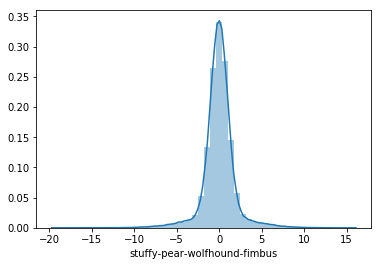

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train[train.columns[10]])
plt.figure()
sns.distplot(train[train.columns[210]])


What about the correlation plot? (it was taking a long time to run, so I restricted it to only the first 50 columns) Compare the results with Allunia's EDA at https://www.kaggle.com/allunia/instant-gratification-some-eda-to-go

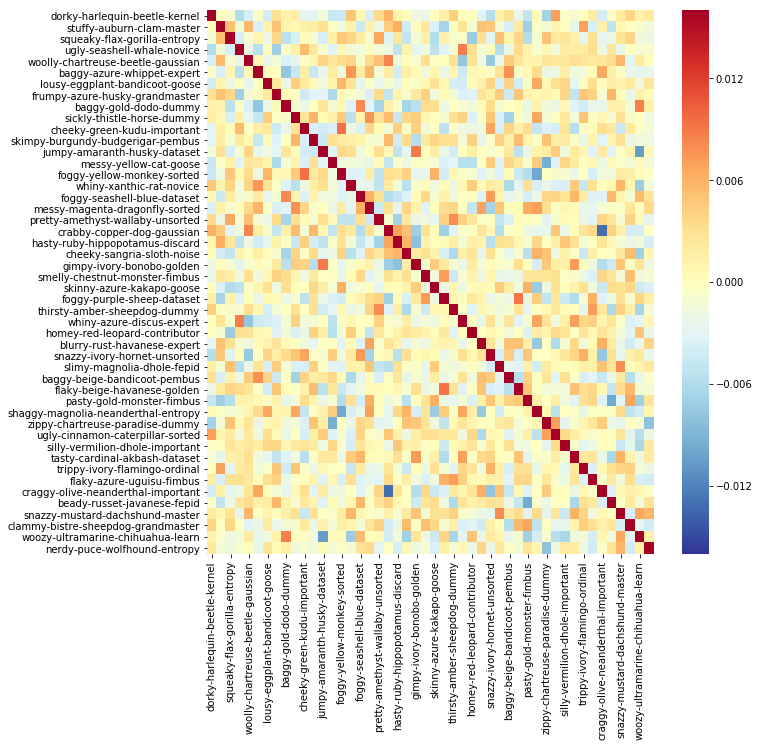

In [7]:
train_corr = train.iloc[:,:50].drop(["target", 'id'], axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(train_corr, vmin=-0.016, vmax=0.016, cmap="RdYlBu_r");

Last but not least, let's filter `train.csv` by the magical feature `wheezy-copper-turtle-magic==0` and see what happens.

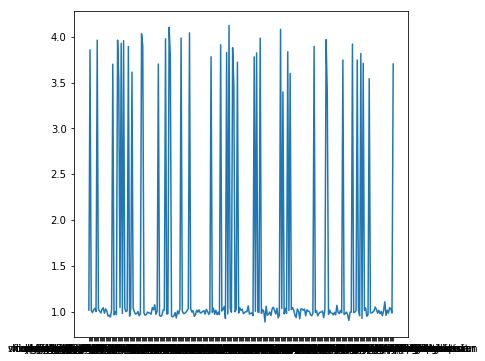

In [8]:
columns = [x for x in train.columns if x not in ["target", 'id', 'wheezy-copper-turtle-magic']]
train2 = train.loc[train['wheezy-copper-turtle-magic']==0, columns]
plt.figure(figsize=(6,6))
plt.plot(train2.std())

Oh cool! we have those useful/useless columns in here too. Surprisingly enough, useless cols have std about 1.0 and useful columns have an STD of about 3.7. Thanks to Chris for his discussion https://www.kaggle.com/c/instant-gratification/discussion/92930#latest-538458

what about the distributions now? do they look normal after filtering?

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


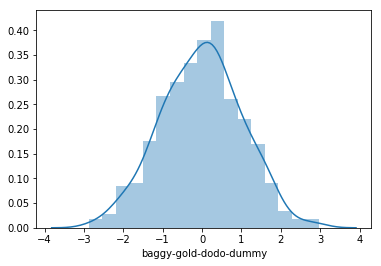

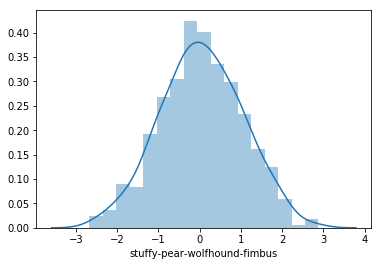

In [9]:
sns.distplot(train2[train.columns[10]])
plt.figure()
sns.distplot(train2[train.columns[210]])

Yes they do. 

EDA shows this dataset is very similar to competition's data. 
Now it's time to build some models on top of this dataset;

Below is the code from Chris' kernel https://www.kaggle.com/cdeotte/logistic-regression-0-800 which has CV score of 0.52994. 

Let's train it on this dataset and compare the CV score.

In [10]:
import numpy as np, pandas as pd, os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

cols = [c for c in train.columns if c not in ['id', 'target']]
oof = np.zeros(len(train))
skf = StratifiedKFold(n_splits=5, random_state=42)
   
for train_index, test_index in skf.split(train.iloc[:,1:-1], train['target']):
    clf = LogisticRegression(solver='liblinear',penalty='l2',C=1.0)
    clf.fit(train.loc[train_index][cols],train.loc[train_index]['target'])
    oof[test_index] = clf.predict_proba(train.loc[test_index][cols])[:,1]
    
auc = roc_auc_score(train['target'],oof)
print('LR without interactions scores CV =',round(auc,5))

LR without interactions scores CV = 0.50401


Below is the code from Chris' kernel https://www.kaggle.com/cdeotte/logistic-regression-0-800 which has CV score of 0.80549.

Let's train it on this dataset and compare the CV score.

In [11]:
# INITIALIZE VARIABLES
cols.remove('wheezy-copper-turtle-magic')
interactions = np.zeros((512,255))
oof = np.zeros(len(train))

# BUILD 512 SEPARATE MODELS
for i in range(512):
    # ONLY TRAIN WITH DATA WHERE WHEEZY EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    train2.reset_index(drop=True,inplace=True)
    
    skf = StratifiedKFold(n_splits=25, random_state=42)
    for train_index, test_index in skf.split(train2.iloc[:,1:-1], train2['target']):
        # LOGISTIC REGRESSION MODEL
        clf = LogisticRegression(solver='liblinear',penalty='l1',C=0.05)
        clf.fit(train2.loc[train_index][cols],train2.loc[train_index]['target'])
        oof[idx1[test_index]] = clf.predict_proba(train2.loc[test_index][cols])[:,1]

        
# PRINT CV AUC
auc = roc_auc_score(train['target'],oof)
print('LR with interactions scores CV =',round(auc,5))

LR with interactions scores CV = 0.855


Below is the code from Chris' kernel https://www.kaggle.com/cdeotte/support-vector-machine-0-925 which has CV score of 0.9262.

Let's train it on this dataset and compare the CV score.

In [12]:
# LOAD LIBRARIES
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
# INITIALIZE VARIABLES
oof = np.zeros(len(train))
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

# BUILD 512 SEPARATE NON-LINEAR MODELS
for i in range(512):
    
    # EXTRACT SUBSET OF DATASET WHERE WHEEZY-MAGIC EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    train2.reset_index(drop=True,inplace=True)
    
    # FEATURE SELECTION (USE APPROX 40 OF 255 FEATURES)
    sel = VarianceThreshold(threshold=1.5).fit(train2[cols])
    train3 = sel.transform(train2[cols])
        
    # STRATIFIED K FOLD (Using splits=25 scores 0.002 better but is slower)
    skf = StratifiedKFold(n_splits=11, random_state=42)
    for train_index, test_index in skf.split(train3, train2['target']):
        
        # MODEL WITH SUPPORT VECTOR MACHINE
        clf = SVC(probability=True,kernel='poly',degree=4,gamma='auto')
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        
    #if i%10==0: print(i)
        
# PRINT VALIDATION CV AUC
auc = roc_auc_score(train['target'],oof)
print('CV score =',round(auc,5))

CV score = 0.93612


## Final notes
* It is very likely that Kaggle used a similar way to generate this competition's dataset. Yet nothing's for sure and they might have tricked a few parts of it so keep searching.
* I believe if you play with `flip_y` and `n_informative` in `make_classification` you can get closer CV scores than mine to those mentioned above.
* I would like to express my gratitude to Chris, Bojan, and other kagglers who generously share their findings with us
* dont forget to upvote all the kernels/discussions linked here 
* please let me know if I used parts of your work here and forgot to link